In [1]:
import matplotlib.pyplot as plt
import numpy as np


/tmp/ipykernel_75803/1759478193.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  a0 += 2/T * np.trapz(y * np.cos(2*np.pi*(i+1)*x/T), x)
/tmp/ipykernel_75803/1759478193.py:29: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  a[i] = 2/T * np.trapz(y * np.cos(2*np.pi*(i+1)*x/T), x)
/tmp/ipykernel_75803/1759478193.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b[i] = 2/T * np.trapz(y * np.sin(2*np.pi*(i+1)*x/T), x)


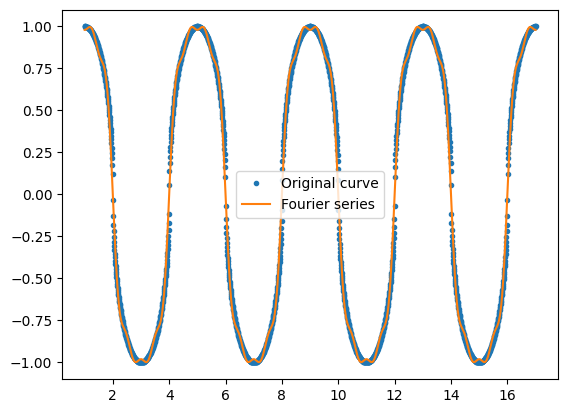

In [2]:
# cualquier curva periodica puede ser describida por una serie de fourier

N_fourier = 30


def fourier_series(t, a0, a, b):

    T = (t[-1] - t[0])
    sum = a0/2
    for i in range(len(a)):
        sum += a[i]*np.cos(2*np.pi*(i+1)*t/T) + b[i]*np.sin(2*np.pi*(i+1)*t/T)
    return sum

def fourier_coefficients(x, y):

    N = len(x)
    a0 = 0
    a = np.zeros(N_fourier)
    b = np.zeros(N_fourier)

    T = (x[-1] - x[0])

    for i in range(N_fourier):
        # a0 += 2/N * y @ np.cos(2*np.pi*(i+1)*x/T)
        # a[i] = 2/N * y @ np.cos(2*np.pi*(i+1)*x/T)
        # b[i] = 2/N * y @ np.sin(2*np.pi*(i+1)*x/T)
        # trapz
        a0 += 2/T * np.trapz(y * np.cos(2*np.pi*(i+1)*x/T), x)
        a[i] = 2/T * np.trapz(y * np.cos(2*np.pi*(i+1)*x/T), x)
        b[i] = 2/T * np.trapz(y * np.sin(2*np.pi*(i+1)*x/T), x)

    return a0, a, b


def theta(x):
    return 0.5 * (np.sign(x) + 1)

r = 1

def fc1(x):

    x = x % (4*r)
    term1 = np.sqrt(np.maximum(0, r**2 - (x - r)**2)) * theta(2 * r - x)
    term2 = np.sqrt(np.maximum(0, r**2 - (x - 3 * r)**2)) * theta(x - 2 * r)
    return term1 - term2

rep = 4
x12 = np.linspace(r,r + rep*4*r,2000)

y12 = fc1(x12)

# compute fourier coefficients
a0, a, b = fourier_coefficients(x12, y12)

plt.plot(x12, y12, '.', label='Original curve')
plt.plot(x12, fourier_series(x12, a0, a, b),label='Fourier series')
plt.legend()


In [3]:
def reduce_points(trajs, num_points=80):
    """
    Reduce el número de puntos de una trayectoria interpolando uniformemente.
    
    Args:
        trajs (np.ndarray): Trayectoria original de forma (N, 3).
        num_points (int): Número deseado de puntos en la nueva trayectoria.
    
    Returns:
        np.ndarray: Trayectoria reducida con forma (num_points, 3).
    """
    # Calcular diferencias y longitudes acumuladas
    diff = np.diff(trajs, axis=0)
    segment_lengths = np.linalg.norm(diff, axis=1)
    cum_lengths = np.concatenate([[0], np.cumsum(segment_lengths)])  # Longitud acumulada
    
    # Crear una nueva distribución de puntos equidistantes
    ts = np.linspace(0, cum_lengths[-1], num_points)
    
    # Interpolar para obtener los nuevos puntos
    x = np.interp(ts, cum_lengths, trajs[:, 0])
    y = np.interp(ts, cum_lengths, trajs[:, 1])
    z = np.interp(ts, cum_lengths, trajs[:, 2])
    
    # Combinar las coordenadas en una nueva trayectoria
    reduced_trajs = np.column_stack((x, y, z))

    # last points 
    last_point = reduced_trajs[-1].copy()

    last_point = last_point + np.array([4,0,0])

    
    reduced_trajs = np.concatenate((reduced_trajs, last_point.reshape(1,3)), axis=0)



    
    return reduced_trajs


In [4]:
x = x12
y = y12
z = 0*x12

trajs = np.array([x, y, z]).T

trajs = reduce_points(trajs)
#
trajs_vec = np.diff(trajs, axis=0)

# 
# 1 vec is 
trajs_vec[0][1] = 0
trajs_vec[-1][1] = 0

In [5]:
trajs

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.31278258e+00,  9.49822049e-01,  0.00000000e+00],
       [ 1.59417349e+00,  8.04325813e-01,  0.00000000e+00],
       [ 1.81594391e+00,  5.78122162e-01,  0.00000000e+00],
       [ 1.95574948e+00,  2.93871916e-01,  0.00000000e+00],
       [ 1.99989274e+00, -1.99454572e-02,  0.00000000e+00],
       [ 2.05661926e+00, -3.31702645e-01,  0.00000000e+00],
       [ 2.20771138e+00, -6.10132326e-01,  0.00000000e+00],
       [ 2.43830545e+00, -8.27332738e-01,  0.00000000e+00],
       [ 2.72526449e+00, -9.61510918e-01,  0.00000000e+00],
       [ 3.03979429e+00, -9.99203729e-01,  0.00000000e+00],
       [ 3.35033046e+00, -9.36617239e-01,  0.00000000e+00],
       [ 3.62571460e+00, -7.80048833e-01,  0.00000000e+00],
       [ 3.83828667e+00, -5.45182863e-01,  0.00000000e+00],
       [ 3.96667104e+00, -2.55599559e-01,  0.00000000e+00],
       [ 4.00197516e+00,  5.96720142e-02,  0.00000000e+00],
       [ 4.07060261e+00,  3.68930325e-01

In [6]:
import gmsh
import numpy as np

# Iniciar GMSH
gmsh.initialize()
gmsh.option.setNumber("Geometry.Tolerance", 1e-5)  # Ajusta la tolerancia

gmsh.model.add("Fourier_Cylinder_OCC_Pipe")

# Parámetros de la trayectoria
# given x,y,z, r
# add disk 

id = 0
r = 0.1
disks = []
wires = []
for i in range(0,len(trajs)-1):
    x, y, z = trajs[i]
    disk = gmsh.model.occ.addCircle(x, y, z, r, id,zAxis=trajs_vec[i],xAxis=[0,1,0])
    # crear loop from disk
    
    disks.append(disk)
    wires.append(gmsh.model.occ.addWire([disk]))
    id += 1


In [7]:

# addThruSections
volumes = []
for i in range(len(disks)-1):
    v = gmsh.model.occ.addThruSections([wires[i], wires[i+1]],makeSolid=True,smoothing=True)
    volumes.append(v)
for i in range(10000):
    volumes = gmsh.model.occ.getEntities(3)
    try:
        gmsh.model.occ.fuse([volumes[-1]], [volumes[-2]],removeObject=True,removeTool=True)
    except:
        break
    print("len", len(volumes))
    gmsh.model.occ.synchronize()

# save geometry

gmsh.model.occ.synchronize()

gmsh.write("fourier_cylinder_occ_pipe.brep")



len 79                                                                                                                   
len 78                                                                                                                   
len 77                                                                                                                   
len 76  : [ 90%] Union - Splitting solids                                                                                
len 75                                                                                                                   
len 74                                                                                                                   
len 73  : [ 90%] Union - Splitting solids                                                                                
len 72                                                                                                                   
len 71                  

In [8]:
# Finalizar GMSH
gmsh.finalize()